# Проект: классификация

In [119]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from  sklearn.ensemble import IsolationForest
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing  import LabelEncoder
from sklearn import linear_model
from sklearn import tree
from sklearn import ensemble
from sklearn import metrics
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_classif
#импортирем необходимые модули

## Часть 1. Знакомство с данными, обработка пропусков и выбросов

In [120]:
#df = pd.read_csv('https://drive.google.com/u/0/uc?id=1AtmD992X2nOgrYxwLM_jiHpRYe5RWrEf&export=download', sep = ';')
df = pd.read_csv('bank_fin.csv', sep = ';')
df=df.copy()

Данные о клиентах банка:

age (возраст);
job (сфера занятости);
marital (семейное положение);
education (уровень образования);
default (имеется ли просроченный кредит);
housing (имеется ли кредит на жильё);
loan (имеется ли кредит на личные нужды);
balance (баланс).


Данные, связанные с последним контактом в контексте текущей маркетинговой кампании:

contact (тип контакта с клиентом);
month (месяц, в котором был последний контакт);
day (день, в который был последний контакт);
duration (продолжительность контакта в секундах).
Прочие признаки:

campaign (количество контактов с этим клиентом в течение текущей кампании);
pdays (количество пропущенных дней с момента последней маркетинговой кампании до контакта в текущей кампании);
previous (количество контактов до текущей кампании)
poutcome (результат прошлой маркетинговой кампании).
И, разумеется, наша целевая переменная deposit, которая определяет, согласится ли клиент открыть депозит в банке. Именно её мы будем пытаться предсказать в данном кейсе.

In [121]:
df.head(5)     #отобразим первые строки данных

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,"2 343,00 $",yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,"45,00 $",no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,"1 270,00 $",yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,"2 476,00 $",yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,"184,00 $",no,no,unknown,5,may,673,2,-1,0,unknown,yes


### Задание 1

Задание 2.1

В каком признаке пропущенных значений больше всего?

In [122]:
# исследуйте данные на предмет пропусков. Где есть пропущенные значения? Сколько их?
# ваш код

df.isnull().sum()    #посчитаем нулевые значения

age           0
job           0
marital       0
education     0
default       0
balance      25
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
deposit       0
dtype: int64

### Задание 2

Задание 2.2

Введите слово, которым закодированы пропуски (неизвестные значения).

In [123]:
# есть ли в признаке job пропущенные значения? Возможно, они обозначены каким-то специальным словом?
# ваш код
#df['job'].describe()
df['job'].value_counts()   #посчитаем нулевые значения в признаке 'job'

management       2566
blue-collar      1944
technician       1823
admin.           1334
services          923
retired           778
self-employed     405
student           360
unemployed        357
entrepreneur      328
housemaid         274
unknown            70
Name: job, dtype: int64

### Задание 3

In [124]:
df['balance'].head()  #посмотрим на данные в столбце

0     2 343,00 $ 
1        45,00 $ 
2     1 270,00 $ 
3     2 476,00 $ 
4       184,00 $ 
Name: balance, dtype: object

In [125]:
# преобразуйте признак balance таким образом, чтобы он корректно считывался, как вещественное число (float)
#заменим лишние символы и пробелы в признаке 'balance' через регулярные выражения
df['balance'] = df['balance'].replace('\$','', regex=True).replace(" ",'', regex=True).replace(',','.', regex=True).astype(float)

In [126]:
df['balance'].head() #проверим значения после преобразования

0    2343.0
1      45.0
2    1270.0
3    2476.0
4     184.0
Name: balance, dtype: float64

Задание 2.3
Вычислите среднее значение по преобразованному в корректный вид признаку balance. Ответ округлите до трёх знаков после точки-разделителя.

In [127]:
round(df['balance'].mean(), 3)  #отобразим среднее значение в признаке 'balance'

1529.129

### Задание 4

In [128]:
# обработайте пропуски в признаки balance , заменив их на медианные значения по данному признаку
# ваш код

df.loc[(df['balance'].isnull()==True),'balance']= df['balance'].median() #заменим пропуски медианным значением по столбцу

In [129]:
df['balance'].isnull().sum() #проверим пропуски, показав сумму пропусков

0

Задание 2.4
Вычислите среднее значение по преобразованному в корректный вид признаку balance. Ответ округлите до трёх знаков после точки-разделителя.

In [130]:
round(df['balance'].mean(), 3)  #отобразим среднее значение с округлением до 3х знаков

1526.936

### Задание 5

In [131]:
df.shape

(11162, 17)

In [132]:
df['job'].value_counts()   #посчитаем количество значений в столбце 'job'

management       2566
blue-collar      1944
technician       1823
admin.           1334
services          923
retired           778
self-employed     405
student           360
unemployed        357
entrepreneur      328
housemaid         274
unknown            70
Name: job, dtype: int64

In [133]:
df['education'].value_counts()   #посчитаем количество значений в столбце 'education'

secondary    5476
tertiary     3689
primary      1500
unknown       497
Name: education, dtype: int64

In [134]:
# обработайте пропуски в категориальных признаках: job и education, заменив их на модальные значения
# ваш код
df.loc[(df['job']=='unknown'),'job']= df['job'].mode()[0]    #заменим значения 'unknown' на медиану по признаку
df.loc[(df['education']=='unknown'),'education']= df['education'].mode()[0]

In [135]:
df['job'].value_counts() #проверим изменения со значениями 'unknown'

management       2636
blue-collar      1944
technician       1823
admin.           1334
services          923
retired           778
self-employed     405
student           360
unemployed        357
entrepreneur      328
housemaid         274
Name: job, dtype: int64

In [136]:
df['education'].value_counts() #проверим изменения со значениями 'unknown'

secondary    5973
tertiary     3689
primary      1500
Name: education, dtype: int64

Задание 2.5
После замены пропусков рассчитайте средний баланс для клиентов с самой популярной работой и самым популярным уровнем образования (т. е. для тех, у кого одновременно самая популярная работа и самое популярное образование). Ответ округлите до трёх знаков после точки-разделителя.

In [137]:
value_counts = df['job'].value_counts()  #посчитаем  все значения в стобце 'Job'
df_value_counts = pd.DataFrame(value_counts)  #создадим датафрэйм из value_counts
df_value_counts = df_value_counts.reset_index()
df_value_counts.columns = ['unique_values', 'counts for job']  #укажем названия столбцов
job_top = df_value_counts['unique_values'][0]  #сделаем переменную из топового занчения по признаку 'Job'

In [138]:
value_counts2 = df['education'].value_counts()  #посчитаем  все значения в стобце 'education'
df_value_counts2 = pd.DataFrame(value_counts2)   #создадим датафрэйм из value_counts
df_value_counts2 = df_value_counts2.reset_index()
df_value_counts2.columns = ['unique_values', 'counts for education']  #укажем названия столбцов
education_top = df_value_counts2['unique_values'][0]  #сделаем переменную из топового занчения по признаку 'education'

In [139]:
round(df[(df['job']==job_top)& (df['education']==education_top)]['balance'].mean(), 3)   #посчитаем среднее из топ значений по балансу и образованию

1598.883

In [140]:
df.shape

(11162, 17)

### Задание 6

Задание 2.6

Введите верхнюю и нижнюю границы поиска выбросов по методу Тьюки, округлив их до целых чисел.

In [141]:
#создадим функцию, выдающую верхнюю и нижнюю гранцы выбросов данных
def outliers_iqr(data, feature):
    x = data[feature]
    quartile_1, quartile_3 = np.percentile(x, 25), np.percentile(x, 75),
    iqr = quartile_3 - quartile_1     #определим межквартильный размах
    lower_bound = quartile_1 - (iqr * 1.5)     #определим нижнюю границу
    upper_bound = quartile_3 + (iqr * 1.5)     #определим верхнюю границу
    outliers = data[(x<lower_bound) | (x > upper_bound)]    #отфильтруем выбросы
    cleaned = data[(x>=lower_bound) & (x <= upper_bound)]    #отфильтруем данные без выбросов
    return outliers, cleaned, lower_bound, upper_bound

In [142]:
outliers, cleaned, lower_bound,upper_bound = outliers_iqr(df, 'balance')   #применим функцию
print(f'Число выбросов по методу Тьюки: {outliers.shape[0]}')
print(f'Результирующее число записей: {cleaned.shape[0]}')

Число выбросов по методу Тьюки: 1057
Результирующее число записей: 10105


In [143]:
print(f'Верхняя и нижняя границы : {upper_bound,lower_bound}')

Верхняя и нижняя границы : (4063.0, -2241.0)


In [144]:
cleaned.shape    #проверим размерность очищенных данных

(10105, 17)

## Часть 2:  Разведывательный анализ

### Задание 1

In [145]:
df2 = cleaned    #создадим переменную из очищенных от выбросов данных

In [146]:
df2.head()    #отобразим первые 5 строк данных

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343.0,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45.0,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270.0,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476.0,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184.0,no,no,unknown,5,may,673,2,-1,0,unknown,yes


Задание 3.1
Сколько клиентов открыли депозит?

In [147]:
df2.loc[df2['deposit']=='yes']['deposit'].value_counts()[0]    #посчитаем количество открывших депозит

4681

In [148]:
# изучите соотношение классов в ваших данных на предмет несбалансированности, проиллюстрируйте результат
# ваш код

In [149]:
graf1 = df2.groupby(['deposit'])['deposit'].count() #как вариант решения, группировка по депозиту
graf1

deposit
no     5424
yes    4681
Name: deposit, dtype: int64

In [150]:
graf2=pd.DataFrame(df2['deposit'].value_counts(), columns = ['deposit'])
graf2

,deposit
no,5424
yes,4681


<AxesSubplot: xlabel='deposit', ylabel='count'>

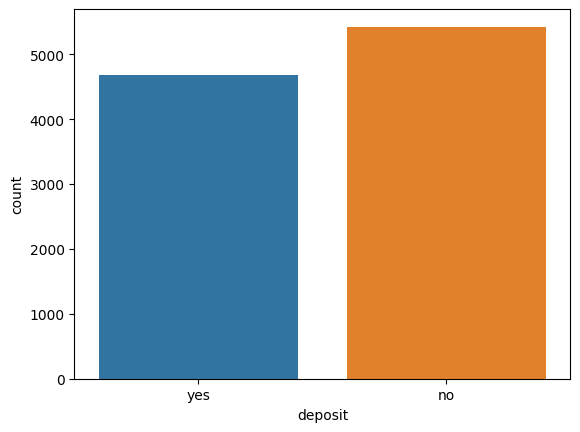

In [151]:
sns.countplot(data = df2['deposit'], x= df2['deposit'])

### Задания 2 и 3

In [152]:
#рассчитайте описательные статистики для количественных переменных, проинтерпретируйте результат
#ваш код

In [153]:
'''plt.figure()
sns.pairplot(df2)
plt.show()!!!'''

'plt.figure()\nsns.pairplot(df2)\nplt.show()!!!'

array([[<AxesSubplot: title={'center': 'age'}>,
        <AxesSubplot: title={'center': 'balance'}>,
        <AxesSubplot: title={'center': 'day'}>],
       [<AxesSubplot: title={'center': 'duration'}>,
        <AxesSubplot: title={'center': 'campaign'}>,
        <AxesSubplot: title={'center': 'pdays'}>],
       [<AxesSubplot: title={'center': 'previous'}>, <AxesSubplot: >,
        <AxesSubplot: >]], dtype=object)

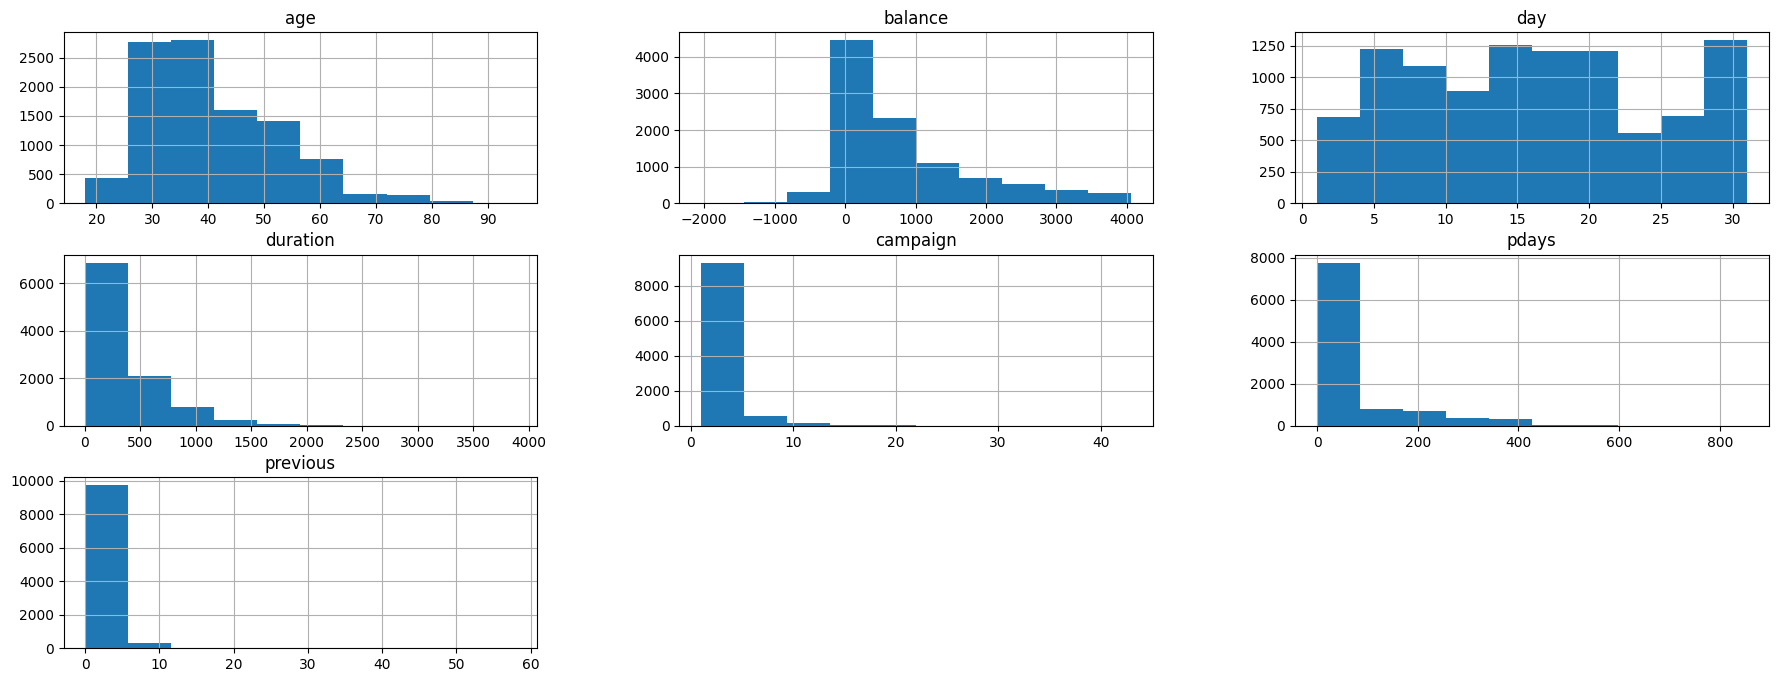

In [154]:
df2.hist(figsize=(22, 8))

In [155]:
df2.describe()

,age,balance,day,duration,campaign,pdays,previous
count,10105.000000,10105.000000,10105.000000,10105.000000,10105.000000,10105.000000,10105.000000
mean,40.895497,807.653538,15.590302,368.742603,2.517170,51.319644,0.816230
std,11.734931,994.151966,8.441510,346.651524,2.707159,109.644179,2.243795
min,18.000000,-2049.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,95.000000,8.000000,137.000000,1.000000,-1.000000,0.000000
50%,38.000000,445.000000,15.000000,252.000000,2.000000,-1.000000,0.000000
75%,48.000000,1227.000000,22.000000,490.000000,3.000000,2.000000,1.000000
max,95.000000,4063.000000,31.000000,3881.000000,43.000000,854.000000,58.000000


Задание 3.2
Каков максимальный возраст клиента банка?

In [156]:
df2['age'].max()    #выведем максимальное значение признака возраст

95

Задание 3.3
Какова минимальная продолжительность разговора с клиентом банка? Ответ дайте в количестве секунд.

In [157]:
df2['duration'].min()    #отобразим минимальную продолжительность разговора

2

Задание 3.4
Сколько было месяцев, в которых проводилась маркетинговая кампания?

In [158]:
len(df2['month'].unique())    #найдем уникальные значения по признаку 'month'

12

Задание 3.5

Сколько сфер занятости представлено среди клиентов банка?

In [159]:
len(df2['job'].unique())

11

### Задания 4 и 5

In [160]:
#рассчитайте описательные статистики для категориальных переменных, проинтерпретируйте результат
#ваш код
#постройте визуализации, иллюстрирующие результаты

### Задание 6

In [161]:
# Узнайте, для какого статуса предыдущей маркетинговой кампании успех в текущей превалирует над количеством неудач.
# ваш код

Задание 3.6

Напишите значение статуса предыдущей кампании, для которой в текущей успехов намного больше, чем неудач.

In [162]:
pd.crosstab(df2['poutcome'],
            df2['deposit'],
            values=df2['deposit'],    #посчитапаем по столбцу 'deposit'
            aggfunc='count')    #агрегирующая функция 'счет'

deposit,no,yes
poutcome,,
failure,562,547
other,216,265
success,84,861
unknown,4562,3008


<AxesSubplot: xlabel='poutcome'>

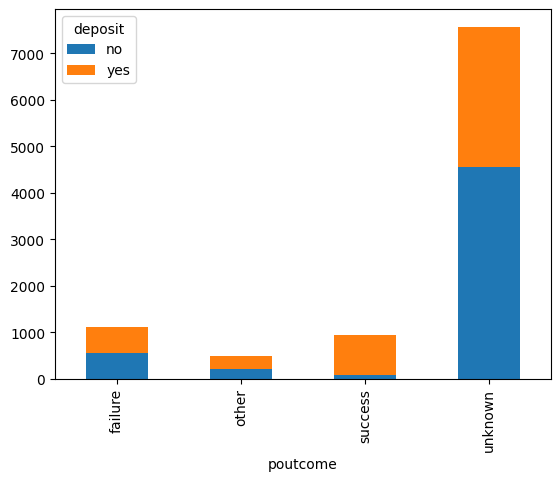

In [163]:
graff = df2.groupby(['poutcome'])['deposit'].value_counts().unstack()  #как вариант
graff.plot(kind='bar', stacked='True')

### Задание 7

In [164]:
# узнайте, в каком месяце чаще всего отказывались от предложения открыть депозит
# ваш код

Задание 3.7

Рассчитайте, в каком месяце самый большой процент неудач при взаимодействии в текущей маркетинговой кампании. Возможно, этот месяц не является подходящим для проведения подобных акций, и это стоит отметить. Введите название месяца латиницей ровно так, как месяц обозначен в данных.

In [165]:
df3 = df2.groupby(['month', 'deposit'])['deposit'].count().unstack() #сгруппируем по столбцам 'month', 'deposit'
df3['total'] = df3['no']+df3['yes']    #посчитаем общее количество депозитов
df3['percent_err']=df3['no']/df3['total']    #найдем коэфициент отказов к общему числу
df3.sort_values(by='percent_err', ascending=False).head(1)   #выведем первое значение 'percent_err' в сортированном

deposit,no,yes,total,percent_err
month,,,,
may,1776,841,2617,0.67864


### Задание 8

In [166]:
# создайте возрастные группы и определите, в каких группах более склонны открывать депозит, чем отказываться от предложения

Задание 3.8

Выберите из списка две возрастные группы, которые более склонны открывать депозит, чем отказываться от открытия депозита в банке после рекламного предложения.

In [167]:
'''def age_group(x):
    if x < 30:
        return '0-30'
    elif 40>x>=30:
        return '30-40'
    elif 50>x>=40:
        return '40-50'
    elif 60>x>=50:
        return '50-60'
    elif x>=60:
        return '60+'
    else:
        return 0

df2['ag_gr'] = df2['age'].apply(age_group) нерабочий вариант'''

df2['ag_gr'] = pd.cut(df2.age, [0,30,40,50,60,9999], labels = ['<30','30-40','40-50','50-60','60+'])  #разграничим значения возраста новый признак 'ag_gr'
df2['ag_gr'].value_counts()    #посчитаем значения по признаку 'ag_gr'

30-40    3842
40-50    2255
<30      1870
50-60    1625
60+       513
Name: ag_gr, dtype: int64

In [168]:
df_gr= df2.groupby(['ag_gr', 'deposit'])['deposit'].count().unstack()  #сгруппируем данные по признаку 'ag_gr' и 'deposit'
df_gr

deposit,no,yes
ag_gr,,
<30,819,1051
30-40,2215,1627
40-50,1360,895
50-60,933,692
60+,97,416


In [169]:
df_gr[df_gr.no <= df_gr.yes]    #отфильтруем по условию, если значение признака "Да" больше признака "Нет"

deposit,no,yes
ag_gr,,
<30,819,1051
60+,97,416


<AxesSubplot: xlabel='ag_gr', ylabel='Count'>

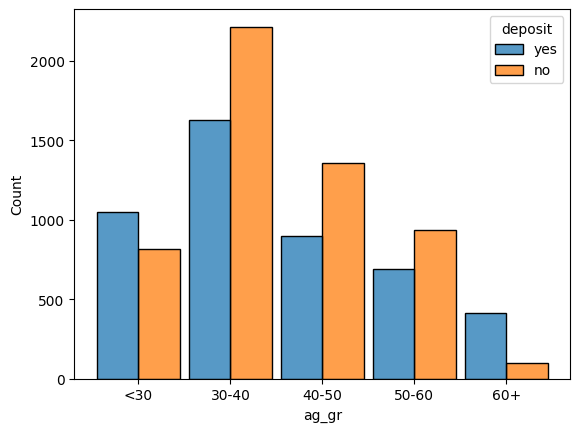

In [170]:
sns.histplot(data=df2, x='ag_gr', hue='deposit', multiple='dodge', shrink=0.9)

### Задания 9 и 10

In [171]:
# постройте визуализации для открывших и неоткрывших депозит в зависимости от вида профессиональной занятости

Задание 3.9

В какой сфере занято наибольшее число клиентов банка?

In [172]:
df_j= df2.groupby(['job', 'deposit'])['deposit'].count().unstack()
#сгруппируем данные по признаку 'job' и 'deposit'
df_j= df_j.sort_values(by ='yes', ascending=False)    #отсортируем по признаку 'yes'
df_j['total']=df_j['yes']+df_j['no']     #посчитаем общее количество депозитов
df_j

deposit,no,yes,total
job,,,
management,1180,1135,2315
technician,900,738,1638
blue-collar,1155,652,1807
admin.,672,574,1246
retired,231,432,663
services,523,345,868
student,81,245,326
unemployed,143,189,332
self-employed,197,161,358


In [173]:
df_j.index[0]    #вывовдим первое значение индекса

'management'

<AxesSubplot: xlabel='Count', ylabel='job'>

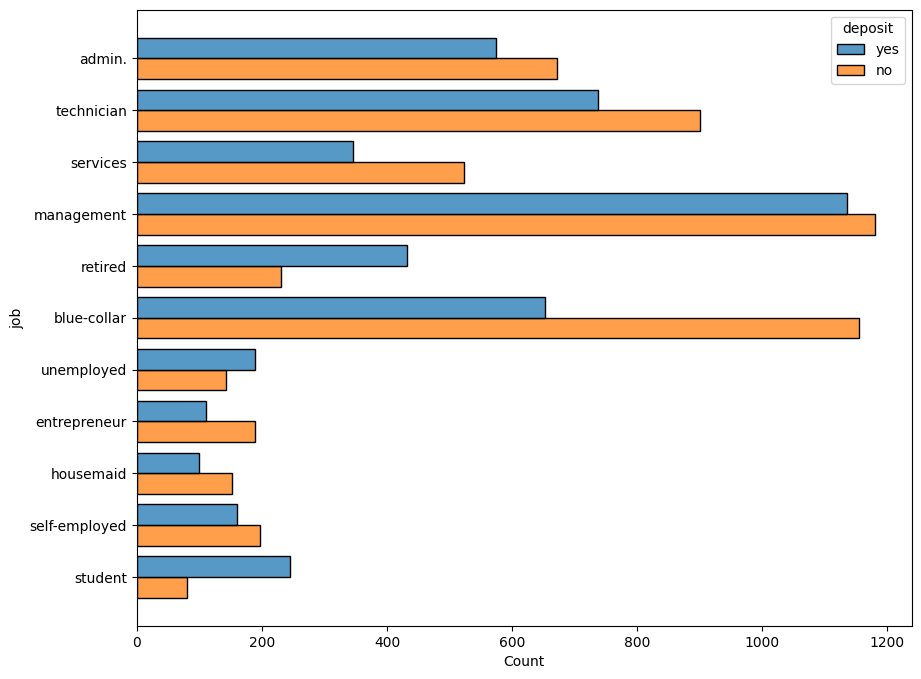

In [174]:
graf_job = df2[['job', 'deposit']]   #отфильтруем данные по работе и депозиту
fig = plt.subplots(figsize=(10, 8))     #построим график
sns.histplot(data=graf_job, y='job', hue='deposit',multiple='dodge', shrink=0.8)

Задание 3.10

При каком семейном положении есть тенденция открывать депозит, а не отказываться от его открытия?

In [175]:
# постройте визуализации для открывших и неоткрывших депозит в зависимости от семейного статуса

In [176]:
df_m= df2.groupby(['marital', 'deposit'])['deposit'].count().unstack()    #сгруппируем данные по признакам 'marital', 'deposit'
df_m

deposit,no,yes
marital,,
divorced,624,553
married,3303,2412
single,1497,1716


In [177]:
df_m[df_m.no <= df_m.yes]    #отфильтруем по условию, если значение признака "Да" больше признака "Нет"

deposit,no,yes
marital,,
single,1497,1716


<AxesSubplot: xlabel='marital', ylabel='Count'>

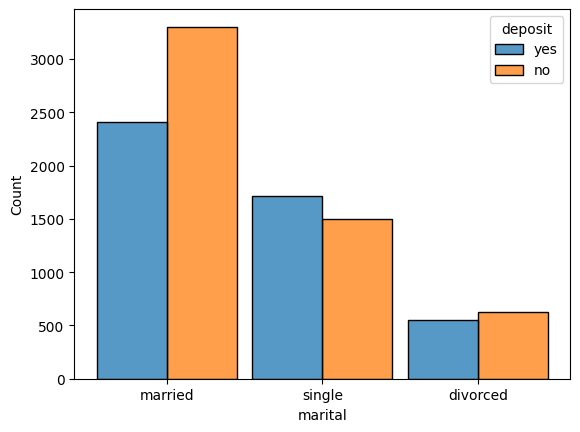

In [178]:
graf_mar = df2[['marital', 'deposit']]    #отфильтруем данные по семейному положению и депозиту
sns.histplot(data=graf_mar, x='marital', hue='deposit',multiple='dodge', shrink=0.9)

In [179]:
# постройте визуализации для открывших и неоткрывших депозит в зависимости от образования

In [180]:
df_e= df2.groupby(['education', 'deposit'])['deposit'].count().unstack()
#отобразим количество сгруппированных депозитов по образованию и депозиту
df_e

deposit,no,yes
education,,
primary,832,517
secondary,3066,2451
tertiary,1526,1713


<AxesSubplot: xlabel='education', ylabel='Count'>

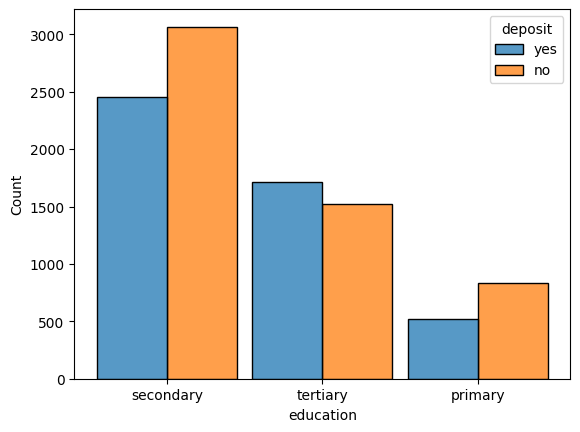

In [181]:
graf_educ = df2[['education', 'deposit']]   #отфильтруем данные по образованию и депозиту
sns.histplot(data=graf_educ, x='education', hue='deposit', multiple='dodge', shrink=0.9)

### Задание 11

In [182]:
# постройте сводную таблицу, чтобы определить люди с каким образованием и семейным статусом наиболее многочисленны
#(если рассматривать тех, кто открыл депозит)

Задание 3.11
Пересечение каких двух категорий является самым многочисленным?

Первая категория:
Вторая категория:

В предыдущих заданиях мы посмотрели различные категории отдельно. Но что будет, если посмотреть на пересечения категорий? Каких людей среди открывших депозит больше: одиноких с высшим образованием или разведённых с более низким уровнем образования?

Разделите таблицу на две части: для тех, кто открыл депозит, и для тех, кто не открыл. Для каждой части постройте сводную диаграмму по уровню образования и семейному положению. Представьте результаты в виде тепловых карт. Различаются ли наиболее популярные группы для открывших депозит и для неоткрывших? Какой вывод вы можете сделать, исходя из полученных данных?

In [183]:
#как вариант решения
df_g= df2.groupby(['marital', 'deposit', 'education'])['deposit'].count().unstack()
df_g

education         primary  secondary  tertiary
marital  deposit                              
divorced no            91        370       163
         yes           96        283       174
married  no           641       1830       832
         yes          339       1289       784
single   no           100        866       531
         yes           82        879       755

In [184]:
group_yes = df2[df2['deposit']=='yes']    #сделаем переменные для crosstab
group_no = df2[df2['deposit']=='no']
cross1 = pd.crosstab(group_yes['education'], group_yes['marital']) #создадим пересечение переменных
cross2 = pd.crosstab(group_no['education'], group_no['marital'])
print(cross1)
print()
print(cross2)

marital    divorced  married  single
education                           
primary          96      339      82
secondary       283     1289     879
tertiary        174      784     755

marital    divorced  married  single
education                           
primary          91      641     100
secondary       370     1830     866
tertiary        163      832     531


Text(0.5, 1.0, 'Тепловая карта открывших депозит')

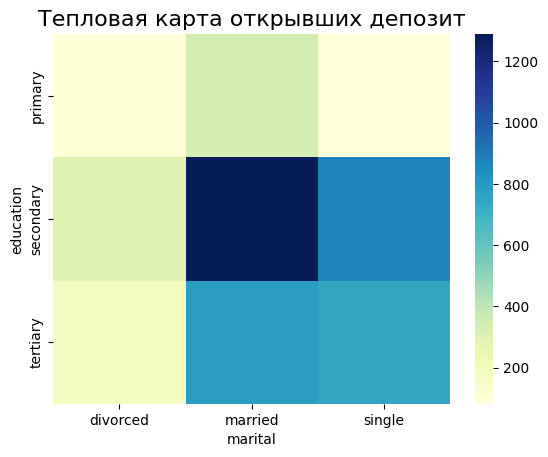

In [185]:
heatmap1 = sns.heatmap(data=cross1, cmap='YlGnBu')    #отобразим на тепловой карте
heatmap1.set_title('Тепловая карта открывших депозит', fontsize=16)

Text(0.5, 1.0, 'Тепловая карта закрывших депозит')

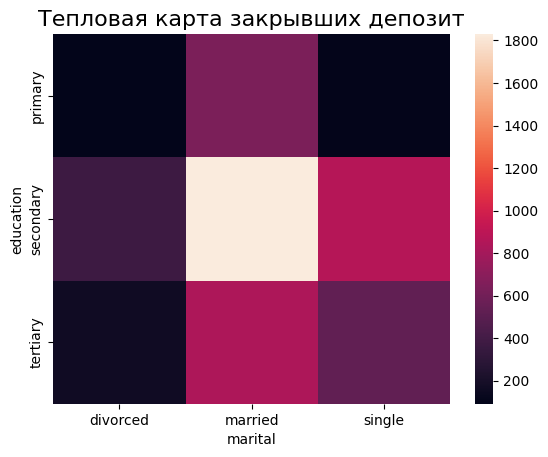

In [186]:
heatmap2 = sns.heatmap(data=cross2)    #отобразим на тепловой карте
heatmap2.set_title('Тепловая карта закрывших депозит', fontsize=16)

## Часть 3: преобразование данных

### Задание 1

In [187]:
# преобразуйте уровни образования
LE=LabelEncoder()
df2['education'] = LE.fit_transform(df2['education'])    #закодируем признак 'education'

In [188]:
df2['education'].sum()    #посчитаем сумму закодированных значений

11995

### Задания 2 и 3

Ранее мы создали порядковую переменную для возраста. Обработайте её по такому же принципу, чтобы её можно было использовать при обучении модели.

In [189]:
# преобразуйте бинарные переменные в представление из нулей и единиц

In [190]:
LE=LabelEncoder()
df2['ag_gr'] = LE.fit_transform(df2['ag_gr'])
df2['ag_gr'].value_counts()

0    3842
1    2255
4    1870
2    1625
3     513
Name: ag_gr, dtype: int64

Обычно в задачах бинарной классификации целевую переменную кодируют как бинарный признак, который принимает значения 1 или 0. Так как наш проект будет соответствовать всем правилам хорошего тона, давайте перекодируем переменную deposit таким образом, чтобы вместо yes она принимала значение 1, а вместо no — 0.

In [191]:
LE=LabelEncoder()
df2['deposit'] = LE.fit_transform(df2['deposit'])
df2['deposit'].value_counts()

0    5424
1    4681
Name: deposit, dtype: int64

In [192]:
round(df2['deposit'].std(),3)

0.499

Сделаем то же самое для других бинарных переменных, которых у нас три:

'default';
'housing';
'loan'.
Все три мы будем модифицировать ровно так же: для слова yes мы возьмём в качестве значения 1, а для no — 0.

In [193]:
#как вариант
#df2['default'] = df2['default'].apply(lambda x: 0 if x == 'no' else 1)
LE=LabelEncoder()
df2['default'] = LE.fit_transform(df2['default'])
df2['housing'] = LE.fit_transform(df2['housing'])
df2['loan'] = LE.fit_transform(df2['loan'])

Задание 4.3

Вычислите среднее арифметическое для каждой из получившихся переменных, сложите три результата и в качестве ответа впишите итог, округлив его до трёх знаков после точки-разделителя.

In [194]:
dhl_mean = df2['default'].mean()+ df2['housing'].mean()+ df2['loan'].mean()
round(dhl_mean, 3)

0.635

### Задание 4

Теперь нам необходимо преобразовать номинальные переменные, которые могут принимать несколько различных значений. Это следующие переменные:

'job';
'marital';
'contact';
'month';
'poutcome'.
Создайте для них dummy-переменные и добавьте их в набор данных.

In [195]:
# создайте дамми-переменные

In [196]:
#categorial_features = ['job', 'marital', 'contact', 'month', 'poutcome']
df2= pd.get_dummies(df2)
#df2 = pd.concat([df2,df3], axis = 1)
df2.shape[1]

46

### Задания 5 и 6

In [197]:
# постройте корреляционную матрицу и оцените данные на предмет наличия мультиколлинеарности

<AxesSubplot: >

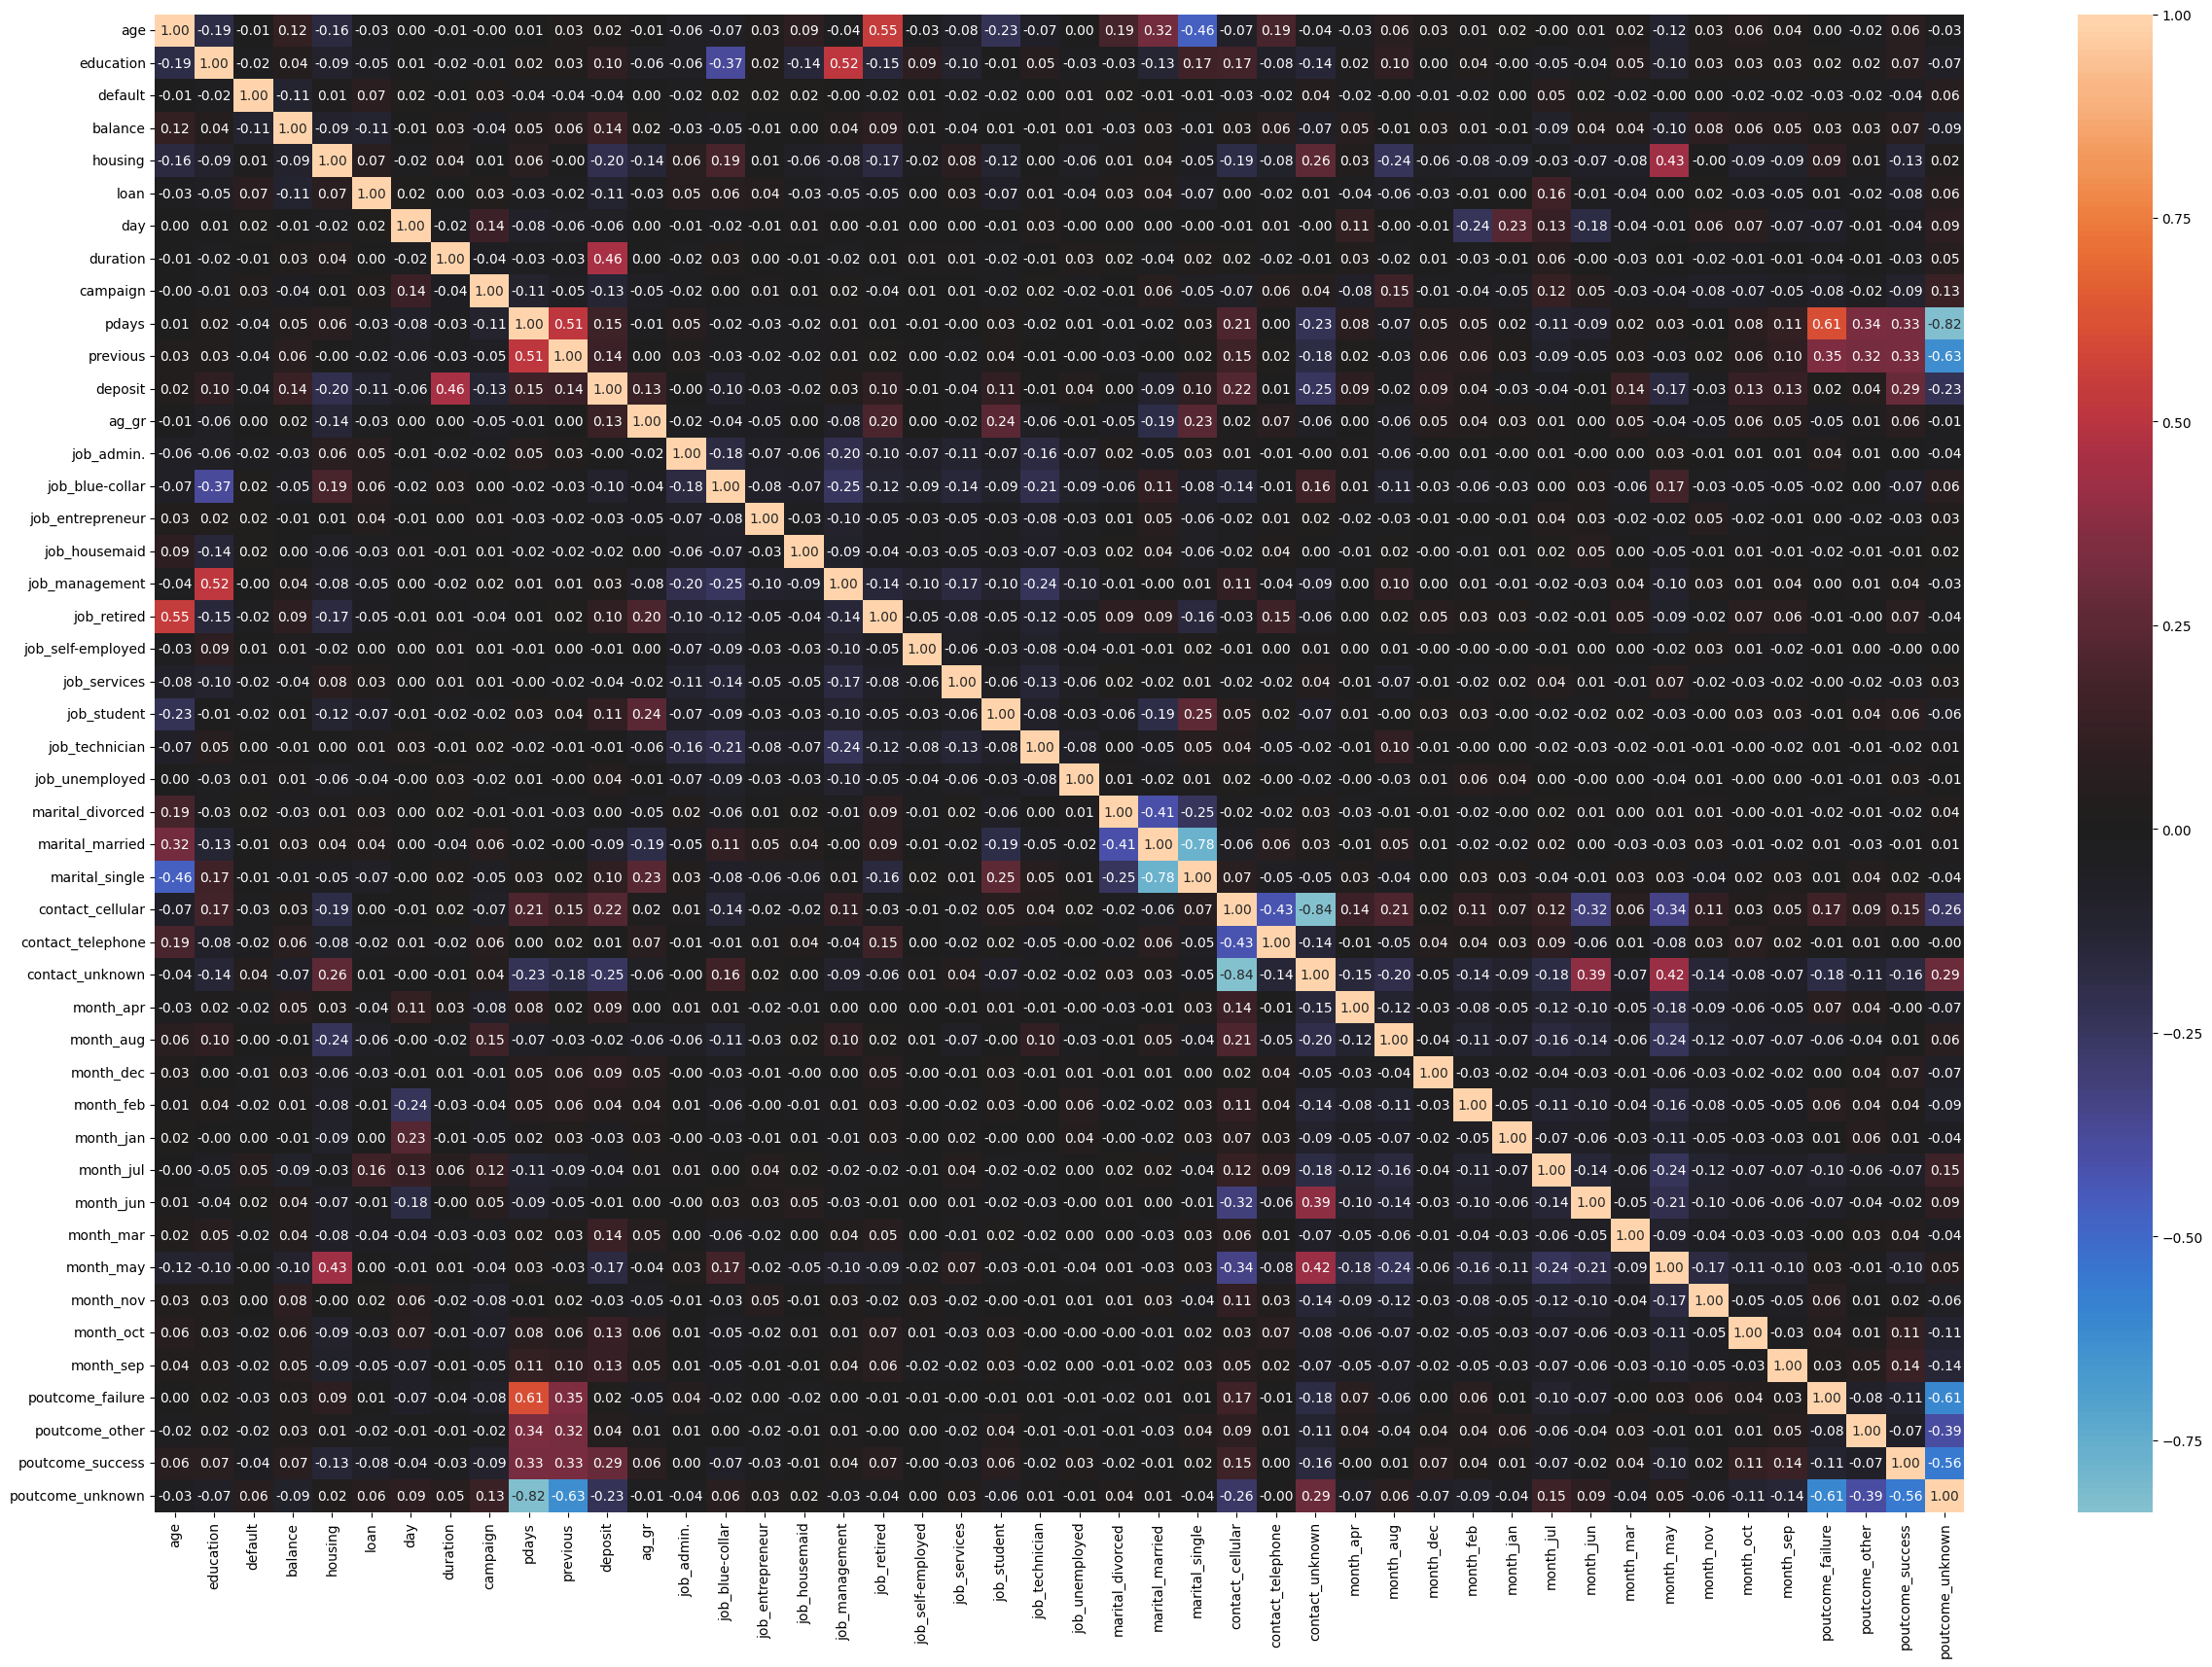

In [198]:
plt.figure(figsize=(30,20))
sns.heatmap(df2.corr(),fmt='.2f',annot=True, center=0)

In [199]:
#df22.corr().sort_values()
corr = df2.corr()     #построим корреляционную матрицу

new_corr = corr['deposit'].reset_index()
sort_corr = new_corr.sort_values('deposit', ascending=False)
sort_corr.head()

,index,deposit
11,deposit,1.000000
7,duration,0.457818
44,poutcome_success,0.288491
27,contact_cellular,0.223944
9,pdays,0.147917


### Задания 7 и 8

In [200]:
#df2 = df2.drop(['job', 'marital', 'contact', 'month', 'poutcome'], axis=1)  #!!!

In [201]:
X = df2.drop(['deposit'], axis=1)
y = df2['deposit']
#создадим обучающие и тестовые выборки для построения модели с параметром stratify=целевой переменной
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state = 42, test_size = 0.33)

In [202]:
# рассчитайте необходимые показатели

Теперь вам необходимо определить целевую переменную и предикторы, а также разделить выборку на обучающую и тестовую.

При разбиении задайте параметр random_state = 42, а размер тестовой выборки возьмите за 0.33. Не забудьте добавить аргумент, определяющий сохранение соотношений целевого признака.

Задание 4.7

Каким получился размер тестовой выборки?

In [203]:
X_test.shape

(3335, 45)

Задание 4.8

Каково среднее значение целевой переменной на тестовой выборке? Ответ округлите до двух знаков после точки-разделителя.

In [204]:
round(y_test.mean(),2)

0.46

### Задание 9

На данный момент у нас достаточно много признаков: скорее всего, не все из них будут важны. Давайте оставим лишь те, которые сильнее всего связаны с целевой переменной и точно будут вносить вклад в повышение качества модели.

С помощью SelectKBest отберите 15 признаков, наилучшим образом подходящих для использования в задаче. Отбор реализуйте по обучающей выборке, используя параметр score_func = f_classif.

Помните, что на данном этапе вам необходимо оставить только те признаки, которые содержат лишь числовые значения.

In [205]:
# с помощью SelectKBest отберите 15 наиболее подходящих признаков

In [206]:
from sklearn.feature_selection import SelectKBest, f_classif

In [207]:
selector = SelectKBest(score_func = f_classif, k=15)    #зададим параметры для модели отбора признаков
selector.fit(X_train, y_train)    #обучим модель

best_col= list(selector.get_feature_names_out())
best_col    #выведим список лучших 15 признаков

['balance',
 'housing',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'ag_gr',
 'contact_cellular',
 'contact_unknown',
 'month_mar',
 'month_may',
 'month_oct',
 'month_sep',
 'poutcome_success',
 'poutcome_unknown']

In [208]:
'month_jan'

'month_jan'

### Задание 10

In [209]:
# нормализуйте данные с помощью minmaxsxaler

Теперь данные необходимо нормализовать.

Есть разные варианты нормализации, но мы будем использовать min-max-нормализацию.

Помните, что нормализация требуется для предикторов, а не для целевой переменной.

Нормализуйте предикторы в обучающей и тестовой выборках.

In [210]:
df3= pd.DataFrame(df2, columns = best_col)   #отфильтруем данные по лучшими признакам

In [211]:
X = df3
y = df2['deposit']
#создадим обучающие и тестовые выборки для построения модели с параметром stratify=целевой переменной
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state = 42, test_size = 0.33)

In [212]:
scaler = preprocessing.MinMaxScaler()    #инициализируем стандартизацию
scaler.fit(X_train)     #обучим алгоритм
X_train_scaled = scaler.transform(X_train)   #выведем нормализованные данные
X_test_scaled = scaler.transform(X_test)

Задание 4.10

Рассчитайте среднее арифметическое для первого предиктора (т. е. для первого столбца матрицы) из тестовой выборки. Ответ округлите до двух знаков после точки-разделителя.

In [213]:
round(X_test_scaled[:, 0].mean(), 2)

0.47

In [214]:
arr = np.array(X_test_scaled)     #как вариант решения
temp = arr[:,0]
round(temp.mean(),2)

0.47

# Часть 4: Решение задачи классификации: логистическая регрессия и решающие деревья

### Задание 1

In [215]:
# обучите логистическую регрессию и рассчитайте метрики качества

Для начала реализуем самый простой алгоритм, который вам известен — логистическую регрессию. В качестве алгоритма оптимизации будем использовать 'sag', в качестве значения параметра random_state возьмём число 42 и запустим 1000 итераций.

Оцените качество модели на тестовой выборке.

In [216]:
#Создаем объект класса логистическая регрессия
log_reg = linear_model.LogisticRegression(solver='sag',max_iter = 1000, random_state=42)
#Обучаем модель, минимизируя logloss
log_reg.fit(X_train_scaled, y_train)
print("accuracy на тестовом наборе: {:.2f}".format(log_reg.score(X_test_scaled, y_test)))
y_test_pred = log_reg.predict(X_test_scaled)
print('f1_score на тестовом наборе: {:.2f}'.format(metrics.f1_score(y_test, y_test_pred)))

accuracy на тестовом наборе: 0.81
f1_score на тестовом наборе: 0.78


### Задания 2,3,4

In [217]:
# обучите решающие деревья, настройте максимальную глубину

Простой алгоритм обучен. Теперь давайте обучим ещё один алгоритм — решающие деревья. В качестве параметров для начала возьмём следующие:

criterion = 'entropy';
random_state = 42.
Остальные параметры оставьте по умолчанию.

Задание 5.2

Что можно наблюдать после реализации алгоритма и оценки его качества?

Переберите различные максимальные глубины деревьев и найдите глубину дерева, для которой будет максимальное значение метрики accuracy, но при этом ещё не будет наблюдаться переобучения (т. е. не будет расти качество на обучающей выборке при неизменном качестве на тестовой).

Задание 5.3

Какое наибольшее значение accuracy у вас получилось? Ответ округлите до двух знаков после точки-разделителя.

Задание 5.4

Какую максимальную глубину дерева вы задали?

In [218]:
#Создаем объект класса решающие деревья
DT = tree.DecisionTreeClassifier(
    criterion='entropy',
    random_state=42,
    max_depth = 6
)
#обучаем модель
DT.fit(X_train_scaled, y_train)
#предсказываем целевое значение
y_train_pred = DT.predict(X_train_scaled)

print('Train: {:.2f}'.format(metrics.accuracy_score(y_train, y_train_pred)))

y_test_pred = DT.predict(X_test_scaled)

print('Test: {:.2f}'.format(metrics.accuracy_score(y_test, y_test_pred)))

Train: 0.82
Test: 0.81


### Задание 5

In [219]:
# подберите оптимальные параметры с помощью gridsearch

Разумеется, у каждой модели может быть множество параметров. Перебирать их вручную, чтобы получить наилучшее качество, долго и трудозатратно. Поэтому мы можем использовать оптимизацию: можно перебрать сразу большое количество комбинаций различных параметров и выбрать тот вариант, при котором модель будет давать наиболее точный прогноз.

Реализуйте оптимизацию гиперпараметров с помощью GridSearch, перебрав следующие параметры:

'min_samples_split': [2, 5, 7, 10];
'max_depth':[3,5,7].

Задание 5.5

Оцените метрику \(F_{1}\) на тестовой выборке для наилучшей комбинации перебираемых параметров. В качестве ответа впишите значение метрики. Ответ округлите до двух знаков после точки-разделителя.

In [220]:
#инициализируем объект класса GridSearchCV
from sklearn.model_selection import GridSearchCV
#зададим пареметры для модели
parameters =  {'min_samples_split': [2, 5, 7, 10], 'max_depth':[3,5,7]}
#Создаем объект класса GridSearchCV
model_cv = GridSearchCV(tree.DecisionTreeClassifier(), parameters,
 cv=3, scoring=('f1'), return_train_score=True)
#обучаем модель
model_cv.fit(X_train_scaled, y_train)

print("Наилучшие значения параметров: {}".format(model_cv.best_params_))

y_test_pred = model_cv.predict(X_test_scaled)

print('f1_score на тестовом наборе: {:.2f}'.format(metrics.f1_score(y_test, y_test_pred)))

Наилучшие значения параметров: {'max_depth': 7, 'min_samples_split': 10}
f1_score на тестовом наборе: 0.80


In [221]:
print(metrics.classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.84      0.81      0.83      1790
           1       0.79      0.82      0.80      1545

    accuracy                           0.81      3335
   macro avg       0.81      0.81      0.81      3335
weighted avg       0.82      0.81      0.81      3335



# Часть 5: Решение задачи классификации: ансамбли моделей и построение прогноза

### Задание 1

In [222]:
# обучите на ваших данных случайный лес

Обучите случайный лес со следующими параметрами:

n_estimators = 100;
criterion = 'gini';
min_samples_leaf = 5;
max_depth = 10;
random_state = 42.

In [223]:
#инициализируем объект класса RandomForestClassifier
RF = ensemble.RandomForestClassifier(
    n_estimators=100,
    criterion='gini',
    min_samples_leaf=5,
    max_depth=10,
    random_state=42
)
#Обучаем модель
RF.fit(X_train_scaled, y_train)
#Выводим значения метрики
y_train_pred = RF.predict(X_train_scaled)
print('Train: {:.2f}'.format(metrics.accuracy_score(y_train, y_train_pred)))
y_test_pred = RF.predict(X_test_scaled)
print('Test accuracy: {:.2f}'.format(metrics.accuracy_score(y_test, y_test_pred)))
print('Train: {:.2f}'.format(metrics.recall_score(y_train, y_train_pred)))
print('Test recall: {:.2f}'.format(metrics.recall_score(y_test, y_test_pred)))

Train: 0.86
Test accuracy: 0.83
Train: 0.86
Test recall: 0.83


In [224]:
print(metrics.classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.85      0.82      0.84      1790
           1       0.80      0.83      0.82      1545

    accuracy                           0.83      3335
   macro avg       0.83      0.83      0.83      3335
weighted avg       0.83      0.83      0.83      3335



### Задания 2 и 3

In [225]:
# используйте для классификации градиентный бустинг и сравните качество со случайным лесом

Дата-сайентист не должен останавливаться на одной модели — он должен пробовать все доступные варианты. Поэтому теперь предлагаем вам сравнить полученные результаты с моделью градиентного бустинга. Используйте градиентный бустинг для решения задачи классификации, задав для него следующие параметры:

learning_rate = 0.05;
n_estimators = 300;
min_samples_leaf = 5;
max_depth = 5;
random_state = 42.

Задание 6.2

Для построенной модели оцените метрику \(F_{1}\) на тестовой выборке. В качестве ответа впишите значение метрики. Ответ округлите до двух знаков после точки-разделителя.

In [226]:
#инициализируем объект класса GradientBoostingClassifier
GB = ensemble.GradientBoostingClassifier(
    learning_rate=0.05,
    n_estimators=300,
    min_samples_leaf=5,
    max_depth=5,
    random_state=42
)
#Обучаем модель
GB.fit(X_train_scaled, y_train)
#Выводим значения метрики
y_train_pred = GB.predict(X_train_scaled)

print('Train: {:.2f}'.format(metrics.f1_score(y_train, y_train_pred)))

y_test_pred = GB.predict(X_test_scaled)
print('Test: {:.2f}'.format(metrics.f1_score(y_test, y_test_pred)))

Train: 0.88
Test: 0.82


In [227]:
print(metrics.classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.85      0.82      0.84      1790
           1       0.80      0.83      0.82      1545

    accuracy                           0.83      3335
   macro avg       0.83      0.83      0.83      3335
weighted avg       0.83      0.83      0.83      3335



Задание 6.3

Какая модель даёт более качественный прогноз (если посмотреть известные вам метрики в целом)?
Случайный лес
Градиентный бустинг

### Задание 4

In [228]:
# объедините уже известные вам алгоритмы с помощью стекинга

Вы уже попробовали построить разные модели, и теперь пришло время построить ансамбль из моделей разного типа.

В этом задании вам необходимо использовать стекинг, объединив те алгоритмы, которые вы уже использовали ранее: решающие деревья, логистическую регрессию и градиентный бустинг. В качестве метамодели используйте модель логистической регрессии.

Параметры оставьте те же, что были в ваших алгоритмах в предыдущих заданиях.

Задание 6.4

Для построенной модели оцените метрику precision на тестовой выборке. В качестве ответа впишите значение метрики. Ответ округлите до двух знаков после точки-разделителя.

In [229]:
estimators = [
    # ('dt', tree.DecisionTreeClassifier(
    #     criterion='entropy',
    #     min_samples_leaf=5,
    #     max_depth=6,
    #     random_state=42
    #     )
    # ),
        (RF, ensemble.RandomForestClassifier(
        n_estimators=100,
        criterion='gini',
        min_samples_leaf=5,
        max_depth=10,
        random_state=42
        )
    ),
    ('log_reg', linear_model.LogisticRegression(
        solver='sag',
        random_state=42
        )
    ),
    ('GB', ensemble.GradientBoostingClassifier(
        learning_rate=0.05,
        n_estimators=300,
        min_samples_leaf=5,
        max_depth=5,
        random_state=42
        )
    )
]

stack = ensemble.StackingClassifier(
    estimators,
    final_estimator=linear_model.LogisticRegression(random_state=42)
)
stack.fit(X_train_scaled, y_train)

y_train_pred = stack.predict(X_train_scaled)
print('Train: {:.2f}'.format(metrics.precision_score(y_train, y_train_pred)))
y_test_pred = stack.predict(X_test_scaled)
print('Test: {:.2f}'.format(metrics.precision_score(y_test, y_test_pred)))

print(metrics.classification_report(y_test, y_test_pred))

Train: 0.85
Test: 0.81
              precision    recall  f1-score   support

           0       0.84      0.83      0.84      1790
           1       0.81      0.82      0.81      1545

    accuracy                           0.83      3335
   macro avg       0.83      0.83      0.83      3335
weighted avg       0.83      0.83      0.83      3335



### Задание 5

In [230]:
# оцените, какие признаки демонстрируют наибольшую  важность в модели градиентного бустинга

<AxesSubplot: >

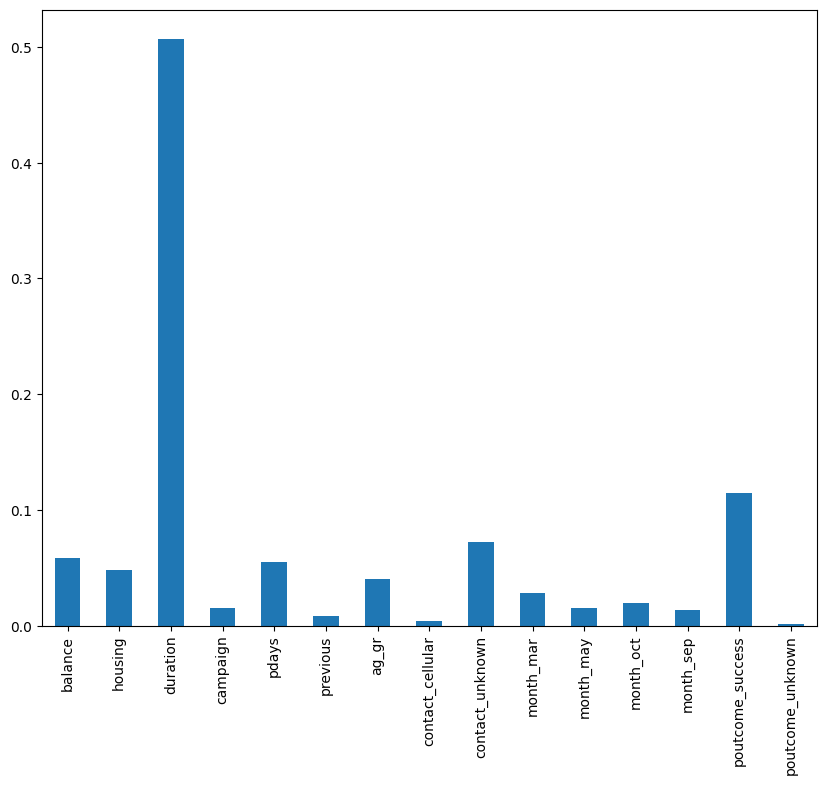

In [231]:
importances = GB.feature_importances_
cols = list(X.columns)
forest_importances = pd.Series(importances, index = cols, name='u')
fig = plt.subplots(figsize=(10, 8))
forest_importances.plot.bar()

### Задания 6,7,8

Ранее мы уже рассматривали оптимизацию гиперпараметров при помощи GridSearch. Однако вы знаете, что это не единственный способ. Один из более продвинутых вариантов оптимизации гиперпараметров — фреймворк Optuna. Примените его для оптимизации гиперпараметров. Для перебора возьмите случайный лес и следующие параметры:

n_estimators = trial.suggest_int('n_estimators', 100, 200, 1);
max_depth = trial.suggest_int('max_depth', 10, 30, 1);
min_samples_leaf = trial.suggest_int('min_samples_leaf', 2, 10, 1).
Задание 6.6
0/1 point (graded)
Введите значение метрики  на тестовой выборке. Ответ округлите до двух знаков после точки-разделителя.

In [232]:
!pip install optuna

zsh:1: command not found: pip


In [233]:
import optuna

def optuna_rf(trial):
  n_estimators = trial.suggest_int('n_estimators', 100, 200, 1)
  max_depth = trial.suggest_int('max_depth', 10, 30, 1)
  min_samples_leaf = trial.suggest_int('min_samples_leaf', 2, 10, 1)

  model = ensemble.RandomForestClassifier(n_estimators=n_estimators,
                                          max_depth=max_depth,
                                          min_samples_leaf=min_samples_leaf,
                                          random_state=42)
  model.fit(X_train_scaled, y_train)
  score = metrics.f1_score(y_train, model.predict(X_train_scaled))

  return score

study = optuna.create_study()

study.optimize(optuna_rf, n_trials=20)
model = ensemble.RandomForestClassifier(**study.best_params,random_state=42, )
model.fit(X_train_scaled, y_train)
y_train_pred = model.predict(X_train_scaled)

print("accuracy на тестовом наборе: {:.3f}".format(model.score(X_test_scaled, y_test)))
y_test_pred = model.predict(X_test_scaled)
print('f1_score на тестовом наборе: {:.3f}'.format(metrics.f1_score(y_test, y_test_pred)))


[I 2022-12-14 20:27:28,542] A new study created in memory with name: no-name-d9808253-6e22-44c6-90ac-f3a0e970c9cd
[I 2022-12-14 20:27:28,934] Trial 0 finished with value: 0.8625 and parameters: {'n_estimators': 124, 'max_depth': 15, 'min_samples_leaf': 5}. Best is trial 0 with value: 0.8625.
[I 2022-12-14 20:27:29,268] Trial 1 finished with value: 0.8506716651046549 and parameters: {'n_estimators': 118, 'max_depth': 27, 'min_samples_leaf': 9}. Best is trial 1 with value: 0.8506716651046549.
[I 2022-12-14 20:27:29,822] Trial 2 finished with value: 0.8459366175086288 and parameters: {'n_estimators': 200, 'max_depth': 20, 'min_samples_leaf': 10}. Best is trial 2 with value: 0.8459366175086288.
[I 2022-12-14 20:27:30,350] Trial 3 finished with value: 0.8545966228893058 and parameters: {'n_estimators': 184, 'max_depth': 20, 'min_samples_leaf': 8}. Best is trial 2 with value: 0.8459366175086288.
[I 2022-12-14 20:27:30,952] Trial 4 finished with value: 0.8620528042493361 and parameters: {'n_e

accuracy на тестовом наборе: 0.825
f1_score на тестовом наборе: 0.815


In [234]:
optuna.visualization.plot_param_importances(study, target_name="f1_score")

In [235]:
# реализуйте оптимизацию гиперпараметров с помощью Optuna

In [236]:
def optuna_rf(trial):
  # задаем пространства поиска гиперпараметров
  n_estimators = trial.suggest_int('n_estimators', 100, 200, 1)
  max_depth = trial.suggest_int('max_depth', 10, 30, 1)
  min_samples_leaf = trial.suggest_int('min_samples_leaf', 2, 10, 1)
  # создаем модель
  model = ensemble.RandomForestClassifier(n_estimators=n_estimators,
                                          max_depth=max_depth,
                                          min_samples_leaf=min_samples_leaf,
                                          random_state=42)
  # обучаем модель
  model.fit(X_train_scaled, y_train)
  score = metrics.f1_score(y_train, model.predict(X_train_scaled))
  return score

# study = optuna.create_study(study_name="RandomForestClassifier", direction="maximize")
# study.optimize(optuna_rf, n_trials=20)


study = optuna.create_study()
study.optimize(optuna_rf, n_trials=20)
model = ensemble.RandomForestClassifier(**study.best_params,random_state=42, )
model.fit(X_train_scaled, y_train)

print("accuracy на тестовом наборе: {:.3f}".format(model.score(X_test_scaled, y_test)))
y_test_pred = model.predict(X_test_scaled)
print('f1_score на тестовом наборе: {:.3f}'.format(metrics.f1_score(y_test, y_test_pred)))

[I 2022-12-14 20:27:37,906] A new study created in memory with name: no-name-5be2124e-4aa8-4a48-b1e8-529efe0466ae
[I 2022-12-14 20:27:38,236] Trial 0 finished with value: 0.8503592627303966 and parameters: {'n_estimators': 111, 'max_depth': 30, 'min_samples_leaf': 9}. Best is trial 0 with value: 0.8503592627303966.
[I 2022-12-14 20:27:38,573] Trial 1 finished with value: 0.8665207877461706 and parameters: {'n_estimators': 105, 'max_depth': 19, 'min_samples_leaf': 5}. Best is trial 0 with value: 0.8503592627303966.
[I 2022-12-14 20:27:39,136] Trial 2 finished with value: 0.8663235064732491 and parameters: {'n_estimators': 179, 'max_depth': 25, 'min_samples_leaf': 5}. Best is trial 0 with value: 0.8503592627303966.
[I 2022-12-14 20:27:39,680] Trial 3 finished with value: 0.8579439252336448 and parameters: {'n_estimators': 176, 'max_depth': 27, 'min_samples_leaf': 7}. Best is trial 0 with value: 0.8503592627303966.
[I 2022-12-14 20:27:40,012] Trial 4 finished with value: 0.858792323295365

accuracy на тестовом наборе: 0.825
f1_score на тестовом наборе: 0.815
